<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_1_%E2%80%94_Linear_Regression_%26_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 — Linear Regression & Gradient Descent (From Scratch)

## Goal
Understand what "learning" means in machine learning by implementing linear regression and gradient descent from scratch using only NumPy.

By the end of this week, you should clearly understand:
- What a model is
- How loss measures error
- How gradients drive learning
- Why gradient descent works

---

## 1. What Is a Model?

A machine learning model is a mathematical function that maps inputs to outputs.

For linear regression (1D):

ŷ = wx + b

Where:
- x → input feature
- w → weight (learned parameter)
- b → bias (learned parameter)
- ŷ → predicted output

The goal of learning is to find values of `w` and `b` that best approximate the true output `y`.

---

## 2. Dataset Representation

A dataset consists of input-output pairs:

(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)

In code:
- Inputs are stored as a vector X
- Targets are stored as a vector y

Example:
X = [1, 2, 3, 4]
y = [2, 4, 6, 8]

---

## 3. Prediction Function (Forward Pass)

The prediction function computes the model’s output:

ŷ = wX + b

This step is called the **forward pass**.

---

## 4. Loss Function (How Wrong Is the Model?)

A loss function measures how far predictions are from true values.

### Mean Squared Error (MSE)

L = (1/n) Σ (y − ŷ)²

Properties:
- Always non-negative
- Larger errors are penalized more
- Differentiable (important for learning)

Loss answers the question:
> “How bad is my model right now?”

---

## 5. Why Do We Need Optimization?

Initially, `w` and `b` are random.
We need a systematic way to improve them so that loss decreases.

This process is called **optimization**.

---

## 6. Gradient Descent (Core Learning Algorithm)

Gradient descent updates parameters in the direction that reduces loss.

Update rules:

w = w − α (∂L / ∂w)  
b = b − α (∂L / ∂b)

Where:
- α (alpha) = learning rate
- ∂L/∂w = gradient of loss w.r.t weight
- ∂L/∂b = gradient of loss w.r.t bias

Intuition:
- Gradient = direction of steepest increase
- We move in the opposite direction

---

## 7. Gradients for Linear Regression

For MSE loss:

∂L/∂w = −(2/n) Σ x(y − ŷ)  
∂L/∂b = −(2/n) Σ (y − ŷ)

These gradients tell us:
- How much to change `w` and `b`
- In which direction

---

## 8. Learning Rate (α)

The learning rate controls step size.

- Too small → very slow learning
- Too large → divergence (loss explodes)

Choosing α is critical for stable training.

---

## 9. Training Loop

A complete training process:

1. Initialize w, b
2. Repeat for many epochs:
   - Compute predictions
   - Compute loss
   - Compute gradients
   - Update parameters

This loop is the foundation of **all neural networks**.

---

## 10. When Is Training Successful?

Training is successful when:
- Loss consistently decreases
- Parameters converge
- Predictions closely match true values

---

## Coding Questions (Do NOT use ML libraries)

### Question 1: Simple Linear Regression
Implement linear regression from scratch using NumPy.

Requirements:
- Use MSE loss
- Implement gradient descent manually
- Train on a simple dataset
- Print final `w` and `b`

---

### Question 2: Loss Tracking
Modify your code to:
- Store loss at each epoch
- Plot loss vs epochs
- Explain the curve shape in comments

---

### Question 3: Learning Rate Experiment
Train the same model using:
- Very small learning rate
- Very large learning rate

Observe:
- Convergence speed
- Stability

---

### Question 4: Prediction Quality
After training:
- Predict outputs for new inputs
- Compare predicted vs true values
- Compute final MSE

---

### Question 5: Conceptual (Write Answers)
1. What does the gradient represent physically?
2. Why does loss decrease when we follow the gradient?
3. What happens if learning rate is too high?
4. Is learning guaranteed to find the best solution?

---

## Outcome of Week 1

After completing this week, you should:
- Fully understand linear regression mathematically
- Be able to write gradient descent without help
- Understand the foundation of neural networks


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class SimpleLinearRegression:
  def __init__(self, learning_rate=0.01, epochs=100):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.w = 0.0
    self.b = 0.0
    self.loss_history = []

  def predict(self, X):
    return self.w * X + self.b

  def fit(self, X, y):
    n = len(X)

    for i in range(self.epochs):
       # 1. Make prediction
       y_pred = self.predict(X)

       # 2. Calculate Loss
       loss = np.mean((y - y_pred)**2)
       self.loss_history.append(loss)

       # 3. Calculate Gradient Derivate
       dw = - (2 / n) * np.sum(X * (y - y_pred))
       db = - (2 / n) * np.sum(y - y_pred)

       # 4. Update Parameter
       self.w -= self.learning_rate * dw
       self.b -= self.learning_rate * db



In [3]:
# --- Execution ---
# Simple Dataset: y = 2x + 1
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])

In [10]:
model = SimpleLinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X, y)

In [11]:
print(f"Final w: {model.w:.4f}, Final b: {model.b:.4f}")

Final w: 2.0039, Final b: 0.9860


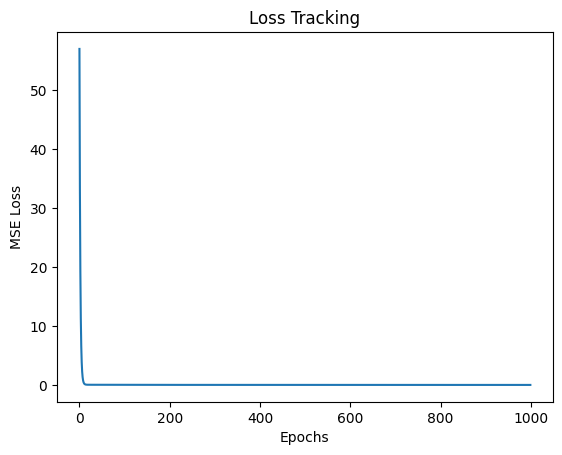

In [12]:
plt.plot(range(model.epochs), model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Tracking")
plt.show()

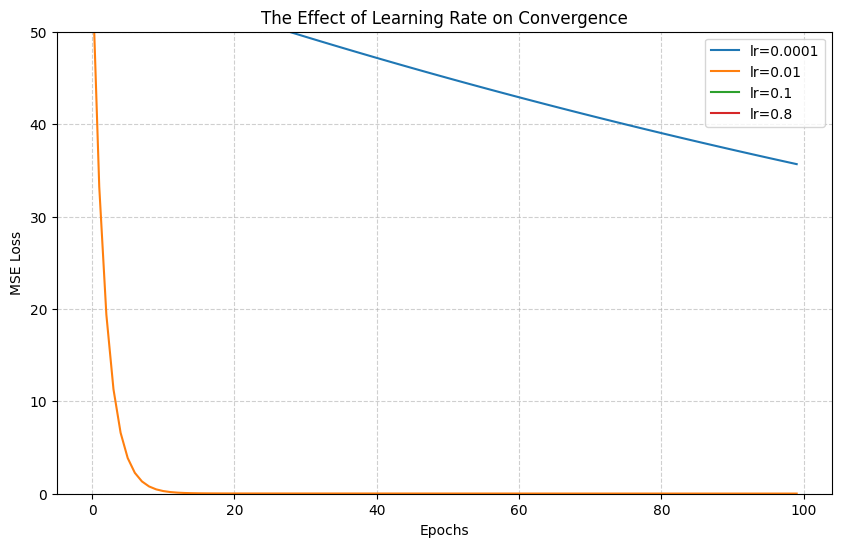

In [13]:

lrs = [0.0001, 0.01, 0.1, 0.8]
plt.figure(figsize=(10, 6))

for lr in lrs:
    # We use a smaller epoch count for the experiment to see the initial behavior
    m = SimpleLinearRegression(learning_rate=lr, epochs=100)
    m.fit(X, y)

    # We only plot if the loss didn't explode into 'inf' or 'nan'
    if not np.isnan(m.loss_history).any():
        plt.plot(m.loss_history, label=f"lr={lr}")
    else:
        print(f"Learning rate {lr} exploded! Skipping plot for stability.")

plt.ylim(0, 50) # Keep the view focused on the useful part of the curve
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("The Effect of Learning Rate on Convergence")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()